In [1]:
# For auto-reloading extenrnal modules see
# http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Imports.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from data_utils import CSVData
from dynamical_systems import linear_system, andronov_hopf, vec_andronov_hopf, vec_roessler_attractor
from nets import RK4N, RK4
from torch.utils.data.sampler import SubsetRandomSampler
from utils import euler, plot_phase_portrait, plot_3d_trajectory, train_valid_loader, extract_min_max, plot_bifurcation

# 1. Linear system.

In [3]:
# Choose your network parameters.
input_size=2
num_param=1
hidden_size=20
h=1
num_hidden_layers=2

# Initialise the model.
model = RK4N(input_size, num_param, hidden_size, h, num_hidden_layers)

In [4]:
# Load data.
dataset = CSVData(csv_file_path='first_model.csv')
train_loader, val_loader = train_valid_loader(dataset)

In [5]:
# Loss & optimizer.
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)

# Losses
train_losses = []
val_losses = []

for epoch in range(10):  # loop over the dataset multiple times

    train_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, params, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs, params)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    val_loss = 0.0
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, params, labels = data

            # forward + loss 
            outputs = model(inputs, params)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
        
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    print('[Epoch: %d] training loss: %.9f  validation loss: %.9f' %
            (epoch + 1, train_loss,val_loss))
    
            

print('Finished Training')

[Epoch: 1] training loss: 0.025440363  validation loss: 0.000022959
[Epoch: 2] training loss: 0.000015664  validation loss: 0.000010344
[Epoch: 3] training loss: 0.000008943  validation loss: 0.000008782
[Epoch: 4] training loss: 0.000006570  validation loss: 0.000004613
[Epoch: 5] training loss: 0.000004462  validation loss: 0.000004934
[Epoch: 6] training loss: 0.000005044  validation loss: 0.000004819
[Epoch: 7] training loss: 0.000004118  validation loss: 0.000003754
[Epoch: 8] training loss: 0.000003775  validation loss: 0.000003817
[Epoch: 9] training loss: 0.000003786  validation loss: 0.000003518
[Epoch: 10] training loss: 0.000003345  validation loss: 0.000003141
Finished Training


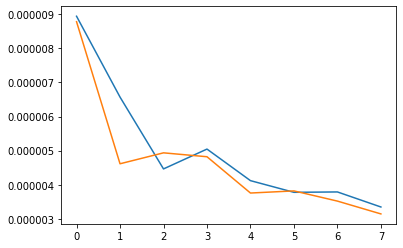

In [6]:
plt.plot(train_losses[2:])
plt.plot(val_losses[2:])
plt.show()

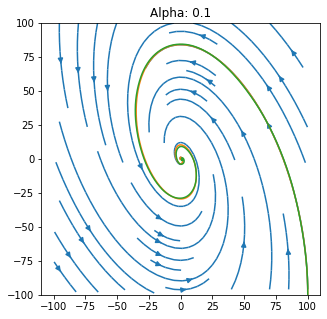

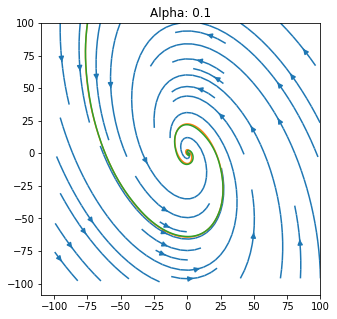

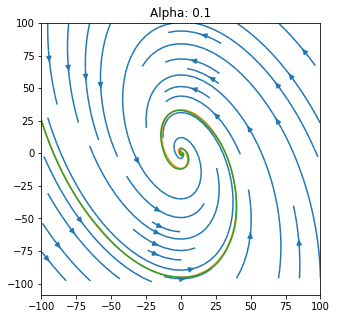

In [7]:
alpha = 0.1

plot_phase_portrait(linear_system, alpha, model, 100, [ 100, -100])
plot_phase_portrait(linear_system, alpha, model, 100, [- 75,  100])
plot_phase_portrait(linear_system, alpha, model, 100, [-100,   25])

# 2. Andronov-Hopf system

In [14]:
# Choose your network parameters.
input_size=2
num_param=1
hidden_size=64
h=1
num_hidden_layers=3

# Initialise the model.
model = RK4N(input_size, num_param, hidden_size, h, num_hidden_layers)

In [15]:
# Load data.
dataset = CSVData(csv_file_path='second_model.csv')
train_loader, val_loader = train_valid_loader(dataset, bs=250)

In [16]:
# Loss & optimizer.
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0)

# Losses
train_losses = []
val_losses = []

for epoch in range(50):  # loop over the dataset multiple times

    train_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, params, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs, params)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    val_loss = 0.0
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, params, labels = data

            # forward + loss 
            outputs = model(inputs, params)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
        
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    print('[Epoch: %d] training loss: %.9f  validation loss: %.9f' %
            (epoch + 1, train_loss,val_loss))
    
            

print('Finished Training')

[Epoch: 1] training loss: 0.000123221  validation loss: 0.000035120
[Epoch: 2] training loss: 0.000026632  validation loss: 0.000016531
[Epoch: 3] training loss: 0.000013985  validation loss: 0.000010023
[Epoch: 4] training loss: 0.000009301  validation loss: 0.000007003
[Epoch: 5] training loss: 0.000006993  validation loss: 0.000006072
[Epoch: 6] training loss: 0.000005582  validation loss: 0.000005121
[Epoch: 7] training loss: 0.000004772  validation loss: 0.000004491
[Epoch: 8] training loss: 0.000004143  validation loss: 0.000003490
[Epoch: 9] training loss: 0.000003660  validation loss: 0.000003752
[Epoch: 10] training loss: 0.000003278  validation loss: 0.000002951
[Epoch: 11] training loss: 0.000002895  validation loss: 0.000002963
[Epoch: 12] training loss: 0.000002732  validation loss: 0.000002358
[Epoch: 13] training loss: 0.000002451  validation loss: 0.000002318
[Epoch: 14] training loss: 0.000002316  validation loss: 0.000001991
[Epoch: 15] training loss: 0.000002102  val

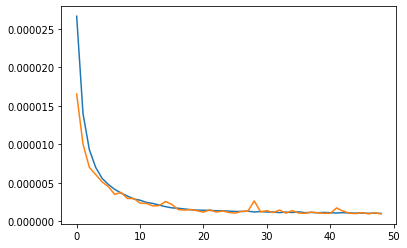

In [17]:
plt.plot(train_losses[1:])
plt.plot(val_losses[1:])
plt.show()

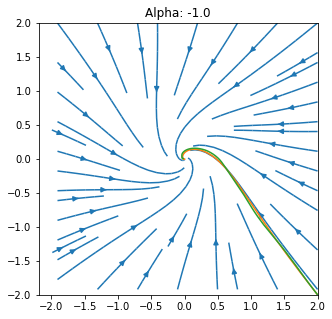

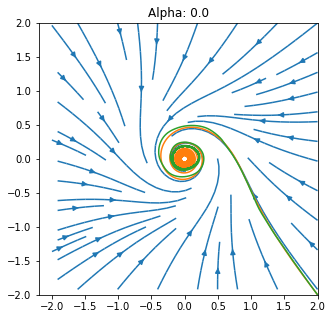

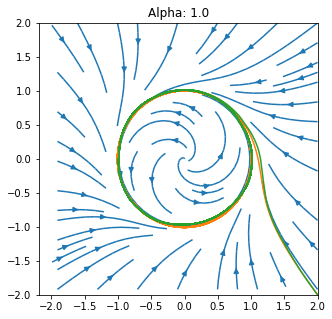

In [18]:
plot_phase_portrait(andronov_hopf, -1.0, model, 2, [2,-2])
plot_phase_portrait(andronov_hopf,  0.0, model, 2, [2,-2])
plot_phase_portrait(andronov_hopf,  1.0, model, 2, [2,-2])

In [19]:
# Bifurcation
alphas = np.linspace(-1.5, 1.5, 31)
x0 = [2, -2]
x_true_mm, x_model_mm = extract_min_max(vec_andronov_hopf, alphas, model, x0)
print('x done!')
y_true_mm, y_model_mm = extract_min_max(vec_andronov_hopf, alphas, model, x0, axis=1)
print('y done!')

x done!
y done!


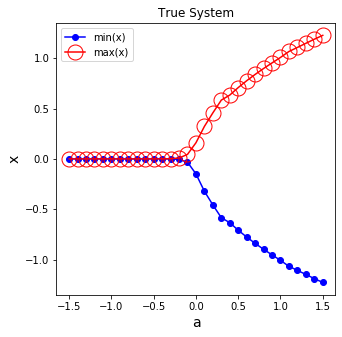

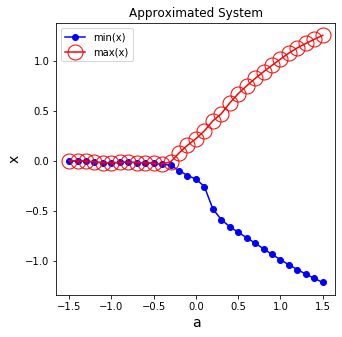

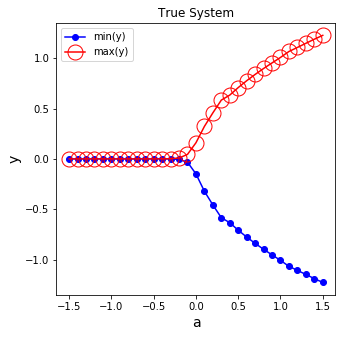

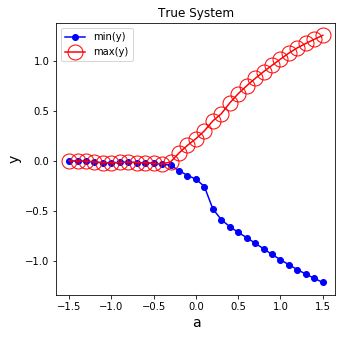

In [20]:
# x coordinate
plot_bifurcation(x_true_mm, alphas)
plot_bifurcation(x_model_mm, alphas, true_sys=False)

# y coordinate
plot_bifurcation(x_true_mm, alphas, axis='y')
plot_bifurcation(x_model_mm, alphas, axis='y')

# 3. Roessler attractor

In [21]:
# Choose your network parameters.
input_size=3
num_param=1
hidden_size=200
h=1
num_hidden_layers=3

# Initialise the model.
model = RK4N(input_size, num_param, hidden_size, h, num_hidden_layers)

In [22]:
# Load data.
dataset = CSVData(csv_file_path='third_model.csv', input_size=3)
train_loader, val_loader = train_valid_loader(dataset, bs=1000)

In [23]:
# Loss & optimizer.
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0)

# Losses
train_losses = []
val_losses = []

for epoch in range(3):  # loop over the dataset multiple times

    train_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        running_loss = 0.0
        # get the inputs; data is a list of [inputs, labels]
        inputs, params, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs, params)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        train_loss += loss.item()
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.9f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    val_loss = 0.0
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, params, labels = data

            # forward + loss 
            outputs = model(inputs, params)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
        
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    print('[Epoch: %d] training loss: %.9f  validation loss: %.9f' %
            (epoch + 1, train_loss,val_loss))
    
            

print('Finished Training')

[1,   200] loss: 0.000065786
[1,   400] loss: 0.000118639
[1,   600] loss: 0.000071324
[1,   800] loss: 0.000016640
[1,  1000] loss: 0.000014627
[1,  1200] loss: 0.000057689
[1,  1400] loss: 0.000011372
[1,  1600] loss: 0.000011628
[1,  1800] loss: 0.000009608
[1,  2000] loss: 0.000026447
[1,  2200] loss: 0.000035536
[1,  2400] loss: 0.000012918
[1,  2600] loss: 0.000007071
[1,  2800] loss: 0.000012333
[1,  3000] loss: 0.000002258
[1,  3200] loss: 0.000006364
[1,  3400] loss: 0.000127563
[1,  3600] loss: 0.000034303
[1,  3800] loss: 0.000008597
[1,  4000] loss: 0.000012837
[1,  4200] loss: 0.000060738
[1,  4400] loss: 0.000008008
[1,  4600] loss: 0.000006962
[1,  4800] loss: 0.000062856
[1,  5000] loss: 0.000006903
[1,  5200] loss: 0.000015678
[1,  5400] loss: 0.000010116
[1,  5600] loss: 0.000052026
[1,  5800] loss: 0.000028764
[1,  6000] loss: 0.000004327
[Epoch: 1] training loss: 0.014363257  validation loss: 0.001969747
[2,   200] loss: 0.000001837
[2,   400] loss: 0.000210340
[2, 

In [24]:
print('Epoch:', str(len(train_losses)))

Epoch: 3


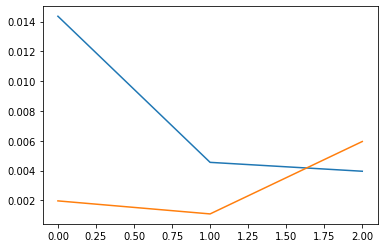

In [25]:
plt.plot(train_losses[0:])
plt.plot(val_losses[0:])
plt.show()

In [26]:
x0 = np.array([5,5,5])

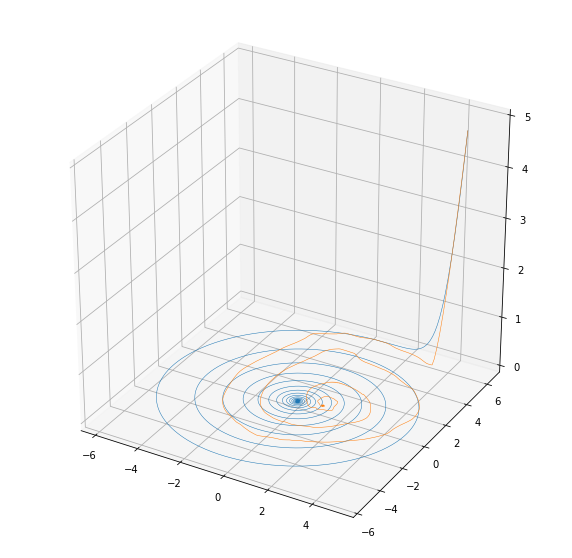

In [27]:
plot_3d_trajectory(vec_roessler_attractor, -0.1, model, x0, lw=0.5)

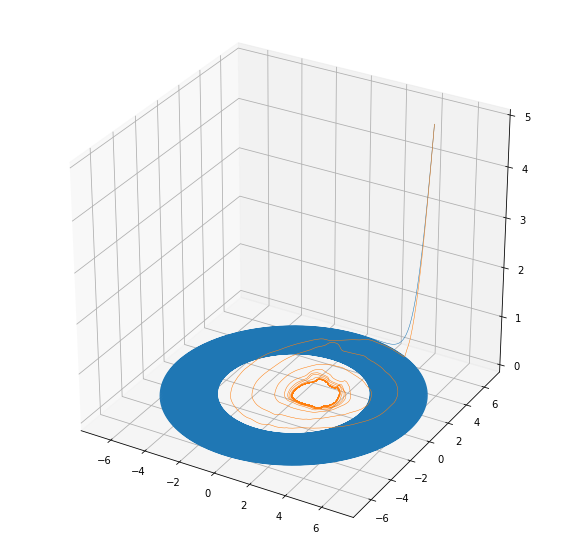

In [28]:
plot_3d_trajectory(vec_roessler_attractor,  0.0, model, x0, lw=0.5)

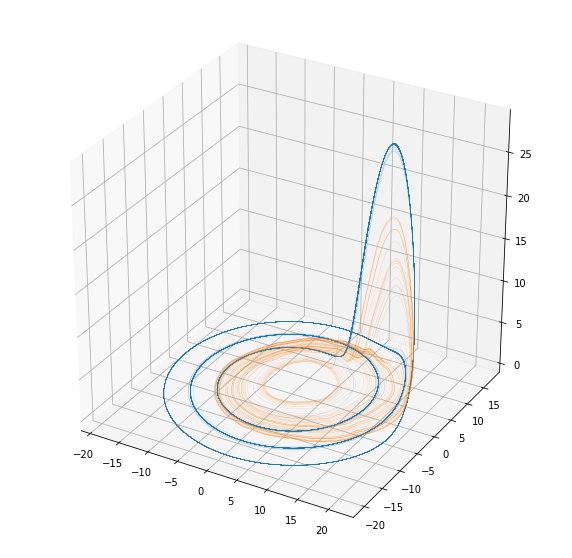

In [29]:
plot_3d_trajectory(vec_roessler_attractor,  0.1, model, x0)

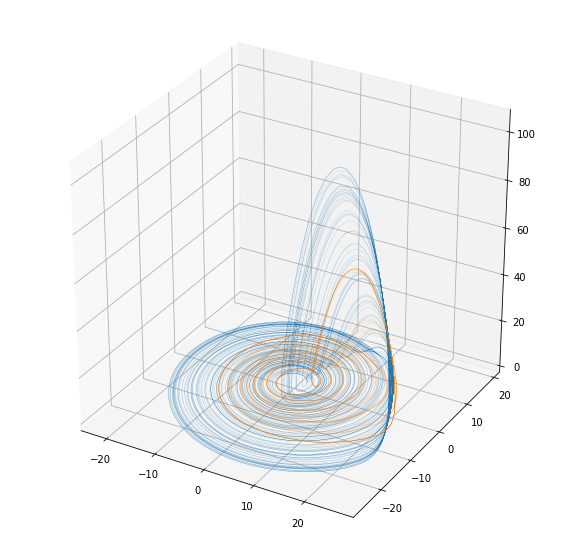

In [30]:
plot_3d_trajectory(vec_roessler_attractor,  0.2, model, x0)

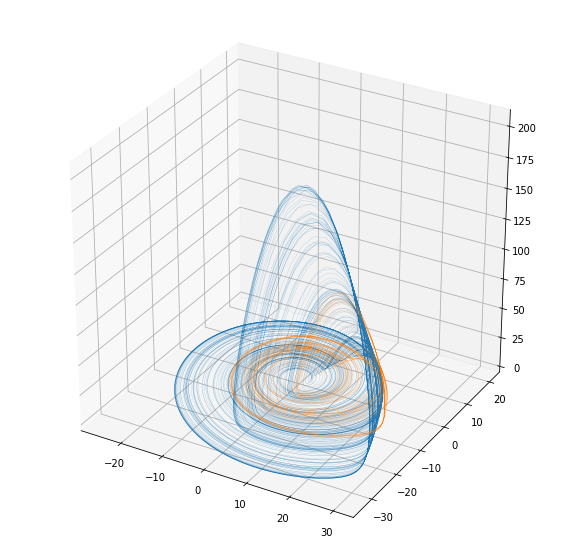

In [31]:
plot_3d_trajectory(vec_roessler_attractor,  0.3, model, x0)

In [32]:
# Bifurcation
a_s = [-0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3]
x_true_mm, x_model_mm = extract_min_max(vec_roessler_attractor, a_s, model, x0)
print('x done!')
y_true_mm, y_model_mm = extract_min_max(vec_roessler_attractor, a_s, model, x0, axis=1)
print('y done!')
z_true_mm, z_model_mm = extract_min_max(vec_roessler_attractor, a_s, model, x0, axis=2)
print('z done!')

x done!
y done!
z done!


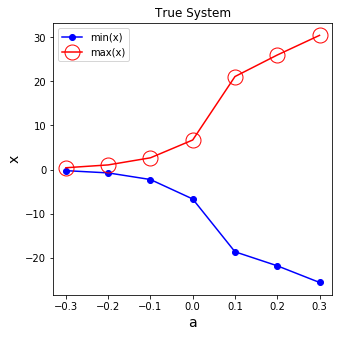

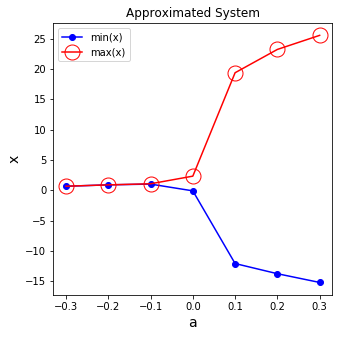

In [33]:
# x coordinate
plot_bifurcation(x_true_mm, a_s)
plot_bifurcation(x_model_mm, a_s, true_sys=False)

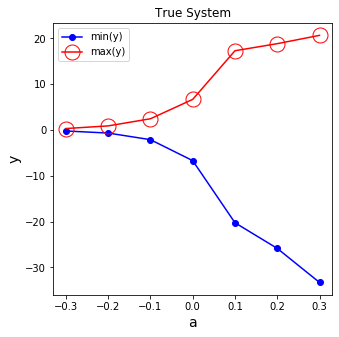

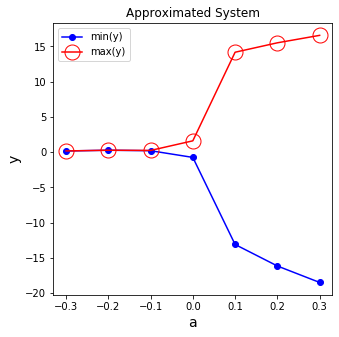

In [34]:
# y coordinate
plot_bifurcation(y_true_mm, a_s, axis='y')
plot_bifurcation(y_model_mm, a_s, true_sys=False, axis='y')

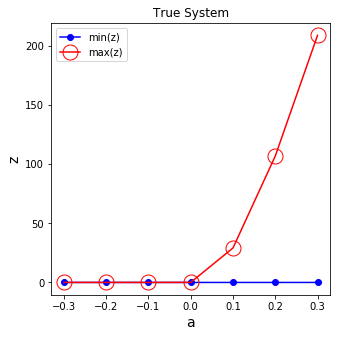

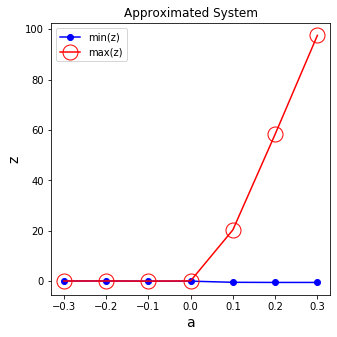

In [35]:
# z coordinate
plot_bifurcation(z_true_mm, a_s, axis='z')
plot_bifurcation(z_model_mm, a_s, true_sys=False, axis='z')